In [185]:
from scipy.stats import expon, norm
import numpy as np
from matplotlib.pyplot import vlines, show, legend
import seaborn as sns

## Условия

$\sqrt{n}\dfrac{Y_n - \mu}{\sigma} \to N(0, 1)$, то

$\sqrt{n}\dfrac{g(Y_n) - g(\mu)}{|g'(\mu)|\cdot\sigma} \to N(0, 1)$

In [186]:
seed = 42
np.random.seed(seed)

In [187]:
lambda_exp = 10

exp_rv = expon(loc=0, scale=1 / lambda_exp)  # loc - сдвиг, scale - матожидание.

exp_rv.mean()

0.1

In [188]:
N = 10
exp_rvs = exp_rv.rvs(size=N)
exp_rvs.mean(), exp_rvs.var()

(0.10269700779013209, 0.007768505974998037)

In [189]:
norm_rv1 = norm(exp_rvs.mean(), exp_rvs.std() / np.sqrt(N))

norm_rv1.mean(), norm_rv1.var()

(0.10269700779013209, 0.0007768505974998037)

Мы знаем, что по ЦПТ наша оценка сходится к нормальному распределению.

Также мы знаем, что $E(Y_n) = E(expon) = \dfrac{1}{\lambda}$

Но мы-то хотим оценить параметр $\lambda$, поэтому введём функцию $g(x) = \dfrac 1 x$, где $g'(x) = - \dfrac 1 {x^2}$, тем самым получив новую оценку уже $E(Y_n)$.

Такая оценка будет состоятельной, так как $g(E(Y_n)) = \dfrac 1 {E(Y_n)} = \dfrac 1 {\frac 1 \lambda} = \lambda$

In [190]:
def g(x, step=0):
    if step == 1:
        return -1 / (x ** 2)
    return 1 / x

In [191]:
norm_rv2 = norm(g(exp_rvs.mean()), g((abs(g(exp_rvs.mean(), 1)) * exp_rvs.std()) / np.sqrt(N)))
print(norm_rv2.mean())
ci = norm.interval(1 - 0.05, norm_rv2.mean(), norm_rv2.std())
print(ci)

9.737382047620745
(8.995739018451758, 10.479025076789732)


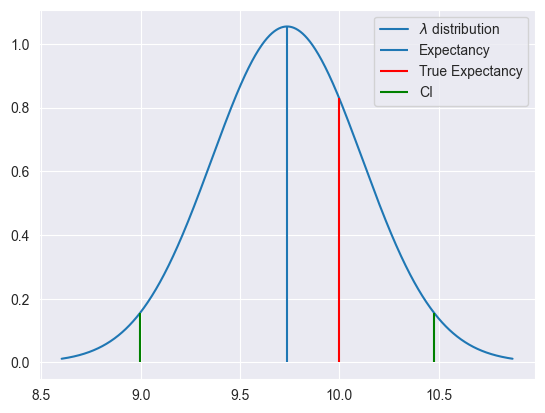

In [192]:
x = np.linspace(norm_rv2.mean() - 3 * norm_rv2.std(), norm_rv2.mean() + 3 * norm_rv2.std(), 1000)

sns.lineplot(x=x, y=norm_rv2.pdf(x), label=r'$\lambda$ distribution')
vlines(x=norm_rv2.mean(), ymin=0, ymax=norm_rv2.pdf(norm_rv2.mean()), label='Expectancy')

vlines(x=lambda_exp, ymin=0, ymax=norm_rv2.pdf(lambda_exp), color='r', label='True Expectancy')

vlines(x=ci[0], ymin=0, ymax=norm_rv2.pdf(ci[0]), color='g', label='CI')
vlines(x=ci[1], ymin=0, ymax=norm_rv2.pdf(ci[1]), color='g')

legend()
show()